In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

### Problem 1: Minisum problem

Taking norm as the metric:

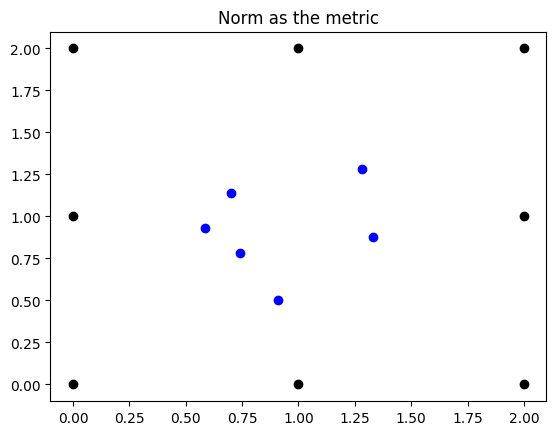

In [ ]:
np.random.seed(1)
num_fixed = 8 # no. of fixed pts
num_var = 6 # no. of variable pts
weights = np.random.normal(5, 1, size=(num_var, num_fixed)) # generating random weights
weights[weights<0] = 0
weights_self = np.random.normal(0.0, 0, size=(num_var, num_var)) # weights between variable points (factories)
weights_self[weights_self<0] = 0
fixed_x = np.array([[2, 2], [0, 2], [2, 0], [0, 0], [2, 1], [1, 2], [0, 1], [1, 0]]) # fixed points locations (warehouses)

# using cvxpy to solve to minimize cost
var_x = cp.Variable((num_var, 2)) # minimising variable (factory locations)
cost = 0

for i in range(num_var):
  for j in range(num_fixed):
    if i != j:
      cost += weights[i, j] * cp.norm(var_x[i] - fixed_x[j])

for i in range(num_var):
  for j in range(num_var):
    if i != j:
      cost += weights_self[i, j] * cp.norm(var_x[i] - var_x[j])

objective = cp.Minimize(cost)
problem = cp.Problem(objective)

problem.solve()

# visualizing ideal locations
for i in range(num_fixed):
  plt.scatter(fixed_x[i][0], fixed_x[i][1], color='black')
for i in range(num_var):
  plt.scatter(var_x.value[i][0], var_x.value[i][1], color='blue')
plt.title("Norm as the metric")
plt.show()

Taking norm squared as the metric:

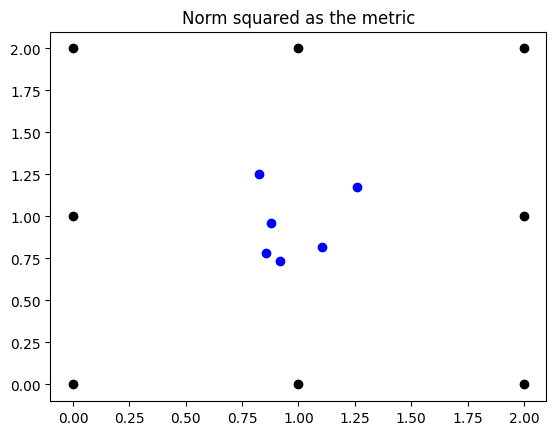

In [ ]:
np.random.seed(0)
num_fixed = 8
num_var = 6
weights = np.random.normal(5, 1, size=(num_var, num_fixed))
weights[weights<0] = 0
weights_self = np.random.normal(0.0, 0, size=(num_var, num_var))
weights_self[weights_self<0] = 0
fixed_x = np.array([[2, 2], [0, 2], [2, 0], [0, 0], [2, 1], [1, 2], [0, 1], [1, 0]])

var_x = cp.Variable((num_var, 2))
cost = 0

for i in range(num_var):
  for j in range(num_fixed):
    if i != j:
      cost += weights[i, j] * cp.norm(var_x[i] - fixed_x[j]) ** 2 # squared the norm

for i in range(num_var):
  for j in range(num_var):
    if i != j:
      cost += weights_self[i, j] * cp.norm(var_x[i] - var_x[j]) ** 2

objective = cp.Minimize(cost)
problem = cp.Problem(objective)

problem.solve()

for i in range(num_fixed):
  plt.scatter(fixed_x[i][0], fixed_x[i][1], color='black')
for i in range(num_var):
  plt.scatter(var_x.value[i][0], var_x.value[i][1], color='blue')
plt.title("Norm squared as the metric")
plt.show()

Adding inequality constraint:

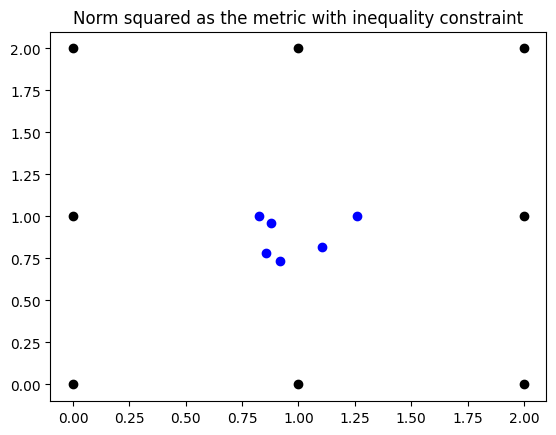

In [ ]:
np.random.seed(0)
num_fixed = 8
num_var = 6
weights = np.random.normal(5, 1, size=(num_var, num_fixed))
weights[weights<0] = 0
weights_self = np.random.normal(0.0, 0, size=(num_var, num_var))
weights_self[weights_self<0] = 0
fixed_x = np.array([[2, 2], [0, 2], [2, 0], [0, 0], [2, 1], [1, 2], [0, 1], [1, 0]])

var_x = cp.Variable((num_var, 2))
cost = 0

for i in range(num_var):
  for j in range(num_fixed):
    if i != j:
      cost += weights[i, j] * cp.norm(var_x[i] - fixed_x[j]) ** 2

for i in range(num_var):
  for j in range(num_var):
    if i != j:
      cost += weights_self[i, j] * cp.norm(var_x[i] - var_x[j]) ** 2

objective = cp.Minimize(cost)
problem = cp.Problem(objective, [var_x[:, 1] <= 1]) # added a constraint

problem.solve()

for i in range(num_fixed):
  plt.scatter(fixed_x[i][0], fixed_x[i][1], color='black')
for i in range(num_var):
  plt.scatter(var_x.value[i][0], var_x.value[i][1], color='blue')
plt.title("Norm squared as the metric with inequality constraint")
plt.show()

### Problem 2: Profit Maximizing problem

In [ ]:
C_arr = np.array([[10, 5, 17], [11, 18, 28], [18, 3, 9]])
A_arr = np.array([400, 700, 600])


for i in range(3):
  # i = 0: Denver, i = 1: Seattle, i = 2: St. Louis
  D = cp.Parameter(3)
  D.value = [300, 100, 500]
  C = cp.Parameter(3)
  C.value = C_arr[i]
  A = cp.Parameter()
  A.value = A_arr[i]
  x = cp.Variable(3)
  objective = cp.Maximize(cp.sum(cp.multiply(x, 100 - C)))
  constraints = [cp.sum(x) <= A, x <= D, x >= 0]
  problem = cp.Problem(objective, constraints)
  problem.solve()

  print(x.value, problem.value)



[3.00000000e+02 1.00000000e+02 3.76370038e-08] 36499.99999966268
[299.99999952  99.99999973 300.00000069] 56499.99998499063
[9.45180572e-08 9.99999999e+01 5.00000000e+02] 55199.999997526786


As can be seen, maximum profit is achieved for Seattle (2nd output)